In [1]:
from MomentumBT import MomentumBT as BT

In [2]:
tester = BT(symbol="EURUSD=X", start = "2018-01-01",end = "2019-12-31", window=3 )

[*********************100%%**********************]  1 of 1 completed


In [3]:
tester.data

,Price,returns,window
Date,,,
2018-01-01,1.200495,NaN,NaN
2018-01-02,1.201158,0.000552,NaN
2018-01-03,1.206345,0.004309,1.202666
2018-01-04,1.201043,-0.004406,1.202849
2018-01-05,1.206884,0.004852,1.204757
...,...,...,...
2019-12-24,1.109385,0.001264,1.109988
2019-12-25,1.109016,-0.000333,1.108795
2019-12-26,1.109545,0.000477,1.109316


In [4]:
tester.half_spread

0.00342382221415942

In [5]:
tester.backtest()

Strategy Net performance: 0.3954 || Strategy outperformance vs Buy and Hold: -0.5315


In [6]:
tester.result

,Price,returns,window,price_diff,positions,trades,creturns,strategy,strategy_net,cstrategy,cstrategy_net
Date,,,,,,,,,,,
2018-01-04,1.201043,-0.004406,1.202849,0.000183,1,0.0,0.995604,NaN,NaN,NaN,NaN
2018-01-05,1.206884,0.004852,1.204757,0.001909,1,0.0,1.000446,0.004852,0.004852,1.004864,1.004864
2018-01-08,1.203746,-0.002603,1.203891,-0.000866,-1,2.0,0.997845,-0.002603,-0.009451,1.002251,0.995411
2018-01-09,1.197046,-0.005582,1.202559,-0.001332,-1,0.0,0.992291,0.005582,0.005582,1.007861,1.000983
2018-01-10,1.192933,-0.003442,1.197908,-0.004650,-1,0.0,0.988882,0.003442,0.003442,1.011336,1.004434
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.109385,0.001264,1.109988,-0.000736,-1,0.0,0.919625,-0.001264,-0.001264,0.995839,0.395106
2019-12-25,1.109016,-0.000333,1.108795,-0.001193,-1,0.0,0.919319,0.000333,0.000333,0.996171,0.395237
2019-12-26,1.109545,0.000477,1.109316,0.000520,1,2.0,0.919758,-0.000477,-0.007325,0.995696,0.392353


In [7]:
tester.result.trades.value_counts()

trades
0.0    381
2.0    136
Name: count, dtype: int64

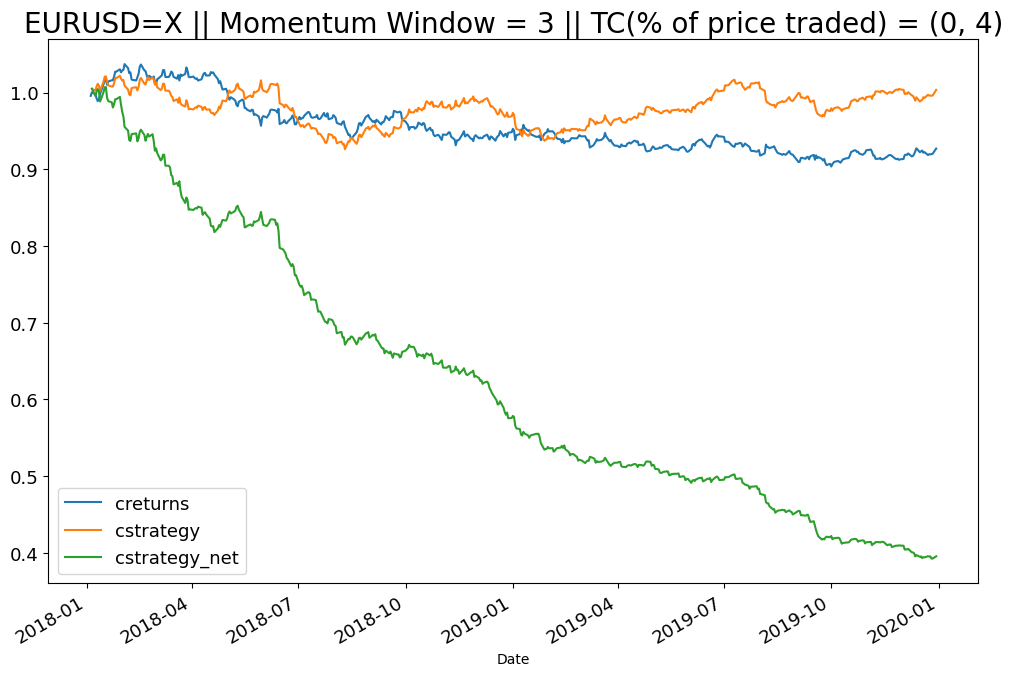

In [8]:
tester.plot_data()

In [9]:
tester.set_window(100)

In [10]:
tester.backtest()

Strategy Net performance: 0.8662 || Strategy outperformance vs Buy and Hold: -0.0818


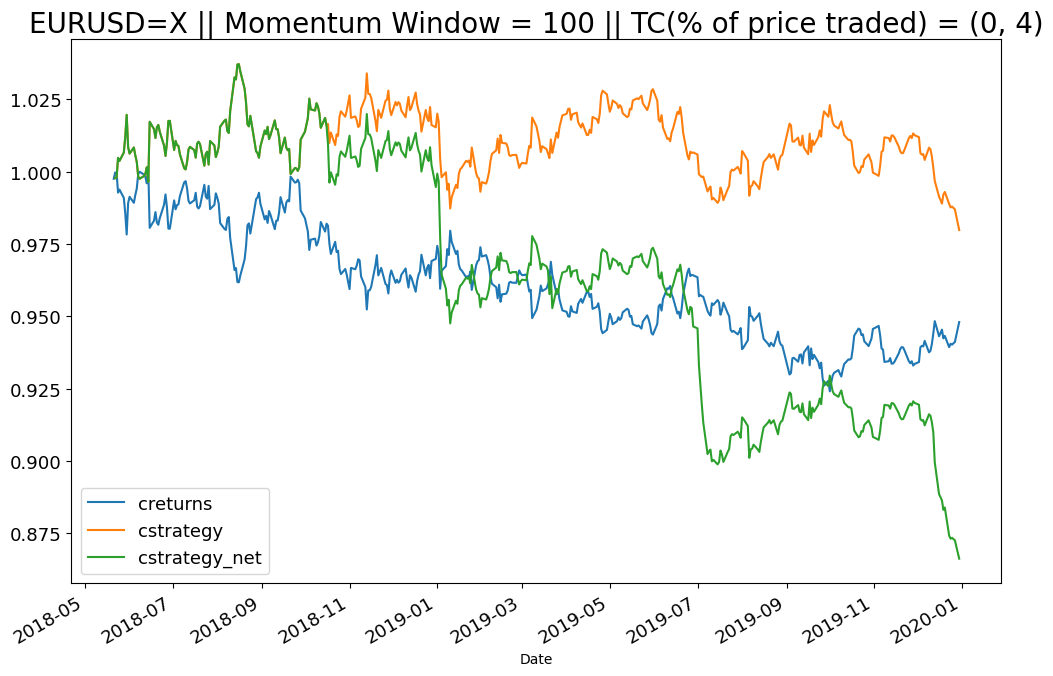

In [11]:
tester.plot_data()

In [13]:
tester.optimise_strategy(window_range=50)

Optimal Window : 37 || Performance : 0.679


In [14]:
tester.set_window(37)

In [15]:
tester.backtest()

Strategy Net performance: 0.679 || Strategy outperformance vs Buy and Hold: -0.2229


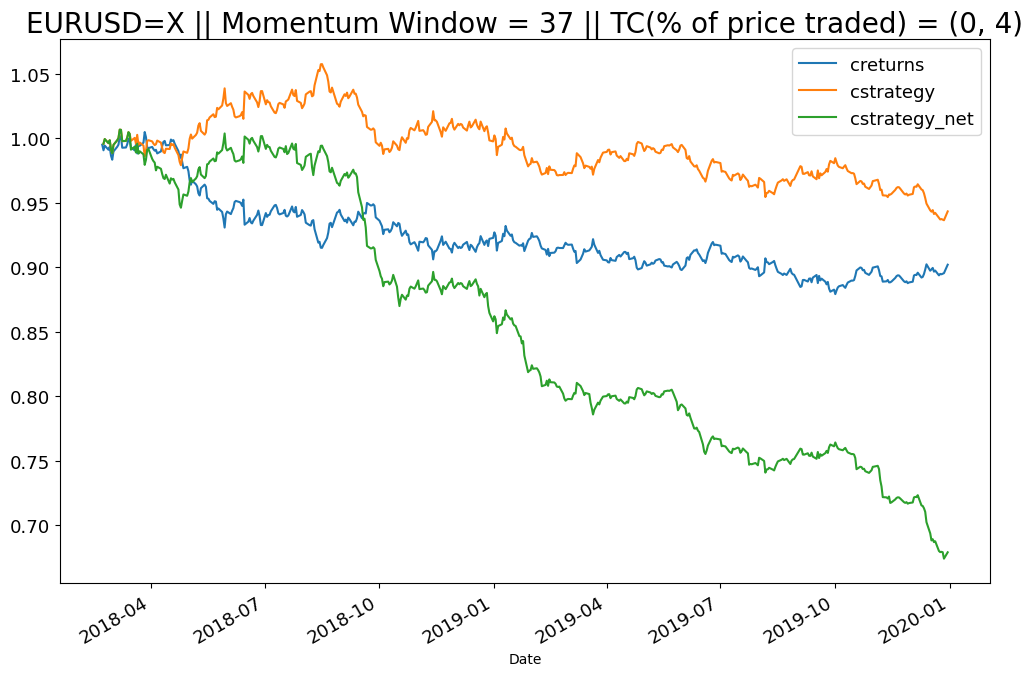

In [16]:
tester.plot_data()

In [17]:
tester.result.trades.value_counts()

trades
0.0    435
2.0     48
Name: count, dtype: int64

In [19]:
tester.half_spread

0.00342382221415942

In [20]:
1 * tester.half_spread

0.00342382221415942

In [21]:
tester.data

,Price,returns,window
Date,,,
2018-01-01,1.200495,NaN,NaN
2018-01-02,1.201158,0.000552,NaN
2018-01-03,1.206345,0.004309,NaN
2018-01-04,1.201043,-0.004406,NaN
2018-01-05,1.206884,0.004852,NaN
...,...,...,...
2019-12-24,1.109385,0.001264,1.107380
2019-12-25,1.109016,-0.000333,1.107173
2019-12-26,1.109545,0.000477,1.107084


In [29]:
tester.data.window.dropna().pct_change() * 100

Date
2018-02-20         NaN
2018-02-21    0.072864
2018-02-22    0.059563
2018-02-23    0.057972
2018-02-26    0.060910
                ...   
2019-12-24   -0.015434
2019-12-25   -0.018648
2019-12-26   -0.008078
2019-12-27    0.006572
2019-12-30    0.027318
Name: window, Length: 484, dtype: float64